<a href="https://colab.research.google.com/github/mizscrystal/Hand-Gesture/blob/main/hand_gesture_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading the necessary library
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
from google.colab import files
data = files.upload()


Saving sign_mnist.csv to sign_mnist (2).csv


In [ ]:
data = pd.read_csv('sign_mnist.csv')
#the head() function in python shows a brief over view of the data.. We used the head function to confirm our data was loaded properly
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
# Save class labels and number of classes
labels = data["label"].values
n_classes = len(np.unique(labels))
print(np.unique(labels))

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


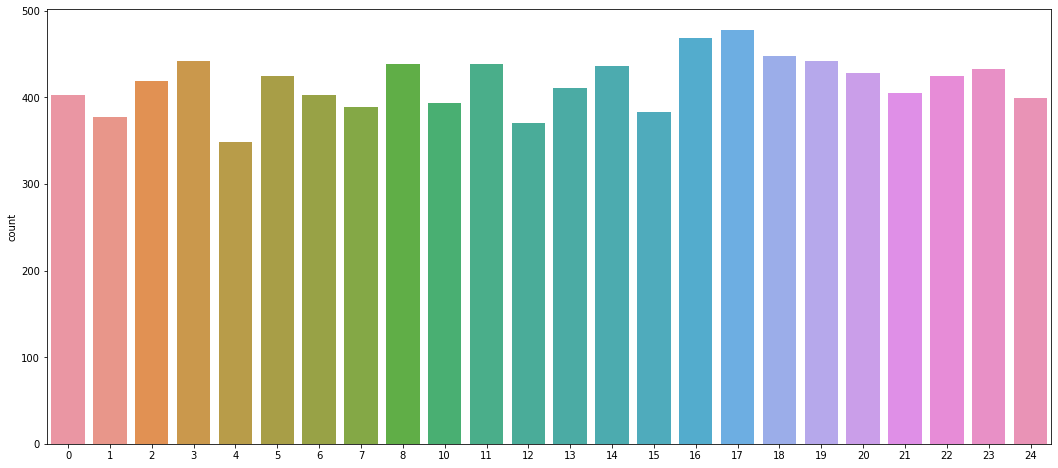

In [ ]:
# Plot distribution of "labels"
import seaborn as sns
plt.figure(figsize = (18,8))
sns.countplot(x=labels)

In [ ]:
# Count amount of each the given class
data.groupby('label').label.count()

label
0     403
1     377
2     419
3     442
4     348
5     424
6     403
7     389
8     438
10    393
11    438
12    370
13    411
14    436
15    383
16    468
17    478
18    448
19    442
20    428
21    405
22    425
23    433
24    399
Name: label, dtype: int64

In [ ]:
# print shapes
train = np.array(data.loc[:, "pixel1":"pixel784"]).reshape(-1, 28, 28)
print(f"train shape: {train.shape}")
print(f"labels shape: {labels.shape}")

train shape: (10000, 28, 28)
labels shape: (10000,)


In [ ]:
import matplotlib.pyplot as plt
# Calling dependecies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# LabelBinarizer create one-hot vector for each class. I used this for print "classification_report"
le = LabelBinarizer()
labels = le.fit_transform(labels)
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [ ]:
# Reshape train examples to (batch_size, 28, 28, 1). Because the image has 28x28 size and 1 channel
train = train.reshape((train.shape[0], 28, 28, 1))
# Normalize train examples between 0 and 1 valuses
train = train / 255.0

train=list(train)
for i in range(len(train)):
    train[i]=train[i].flatten()

# Split data into train and validation samples. 67% for training and 33% for validation
X_train, X_val, y_train, y_val = train_test_split(train, labels, test_size=0.33, random_state=42)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
train=np.array(train)
train=pca.fit_transform(train)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

[0.31136847 0.097361   0.0768097  0.05113522]
[286.31597901 160.10348629 142.20547418 116.02948067]


In [ ]:
#to transform the data
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_val)   

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [ ]:
y_pred_knn = classifier.predict(X_test)  
y_train_score_knn=classifier.predict(X_train)
from sklearn.metrics import accuracy_score
print("accuracy of the model is:\nTest ", accuracy_score(y_val, y_pred_knn, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_knn, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.9006060606060606
Train 0.9570149253731344


In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
clf_rft = RandomForestClassifier(n_estimators=100, max_depth=15,random_state=0)
clf_rft = clf_rft.fit(X_train, y_train)
y_pred_rft=clf_rft.predict(X_test)
y_train_score_rft=clf_rft.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_val, y_pred_rft, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_rft, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.6227272727272727
Train 0.964776119402985


In [ ]:
#ANN
from sklearn.neural_network import MLPClassifier

ann_clf = MLPClassifier()
ann_clf.fit(X_train, y_train)
y_pred_ann=ann_clf.predict(X_test)
y_train_score_ann=ann_clf.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_val, y_pred_ann, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_ann, normalize=True, sample_weight=None))



accuracy of the model is:
Test  1.0
Train 1.0


In [ ]:
names=['K Nearest Neighbour','Random Forest Tree','Artificial Neural Network']
all_models=[y_pred_knn,y_pred_rft,y_pred_ann]
all_training=[y_train_score_knn,y_train_score_rft]
all_training+=[y_train_score_ann]
testing_accuracy=[]
training_accuracy=[]
for i in all_models:
    testing_accuracy.append(accuracy_score(y_val, i, normalize=True, sample_weight=None))
for i in all_training:
    training_accuracy.append(accuracy_score(y_train, i, normalize=True, sample_weight=None))

In [ ]:
import pandas as pd
df=pd.DataFrame({'Names':names,'Training Accuracy':training_accuracy,'Testing Accuracy':testing_accuracy})
df=df[['Names','Training Accuracy','Testing Accuracy']]
df

,Names,Training Accuracy,Testing Accuracy
0,K Nearest Neighbour,0.957015,0.900606
1,Random Forest Tree,0.964776,0.622727
2,Artificial Neural Network,1.000000,1.000000


Comparing all the classifiers, ANN perfromed best in both trainning ang testing. 